# German Traffic Sign Recognition

Bu projede Almanya Trafik İşaretlerini tanıyan bir model geliştiriyoruz.

Projede kullanılan veri setine [buradan](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) ulaşılabilir.

<img src="https://storage.googleapis.com/kaggle-datasets-images/82373/191501/4f9f4f59d288718705ff67449bbc8e66/dataset-cover.jpg?t=2018-11-25-18-48-30">

In [32]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
img_path="Dataset/Train/"
labels = [item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, item))]

In [5]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        i=0
        for img_file in os.listdir(dir+label):
            i+=1
            img_list.append(dir+label+"/"+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [7]:
df=set_df(img_path)

In [9]:
df.sample(10)

,img,label
22305,Dataset/Train/41/00041_00007_00007.png,41
22703,Dataset/Train/21/00021_00000_00017.png,21
30155,Dataset/Train/13/00013_00022_00009.png,13
5934,Dataset/Train/1/00001_00036_00023.png,1
21668,Dataset/Train/12/00012_00033_00023.png,12
15378,Dataset/Train/17/00017_00020_00003.png,17
37413,Dataset/Train/16/00016_00011_00006.png,16
31918,Dataset/Train/10/00010_00013_00010.png,10
17245,Dataset/Train/26/00026_00014_00011.png,26
37038,Dataset/Train/5/00005_00013_00026.png,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     39209 non-null  object
 1   label   39209 non-null  object
dtypes: object(2)
memory usage: 612.8+ KB


In [13]:
image=cv2.imread(str(df["img"][0]))
image.shape

(87, 99, 3)

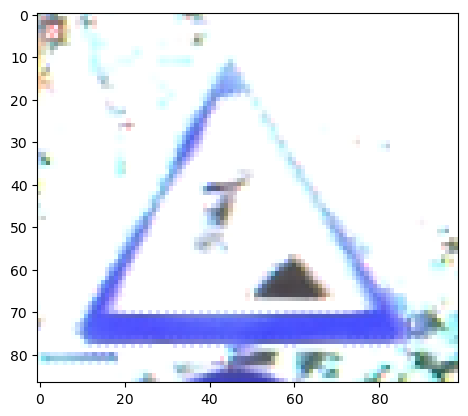

In [15]:
plt.imshow(image)

In [17]:
size=32
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge, img.shape)
    img=cv2.resize(img, (size,size)) #, cv2.INTER_LINEAR)
    img=img/255.0 
    x.append(img)

In [19]:
x=np.array(x)

In [21]:
y=df['label'].astype(int)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

## Modelleme

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

2024-07-11 18:52:22.021255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 18:52:22.040411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 18:52:22.040441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 18:52:22.051951: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 18:52:22.926994: W tensorflow/compiler/tf

In [34]:
model=Sequential()
model.add(Input(shape=(size,size,3)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=.5))
model.add(Dense(43, activation='softmax'))
#categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30, verbose=1)

Epoch 1/30


2024-07-11 18:59:09.154124: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 385437696 exceeds 10% of free system memory.
2024-07-11 18:59:09.399474: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 385437696 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7511 - loss: 1.0318 - val_accuracy: 0.9850 - val_loss: 0.0514
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9805 - val_loss: 0.0610
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9884 - val_loss: 0.0361
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9913 - val_loss: 0.0325
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9949 - loss: 0.0150 - val_accuracy: 0.9879 - val_loss: 0.0514
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9920 - val_loss: 0.0248
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.9957 - val_loss: 0.0188
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9932 - loss: 0.0250 - val_accuracy: 0.9938 - val

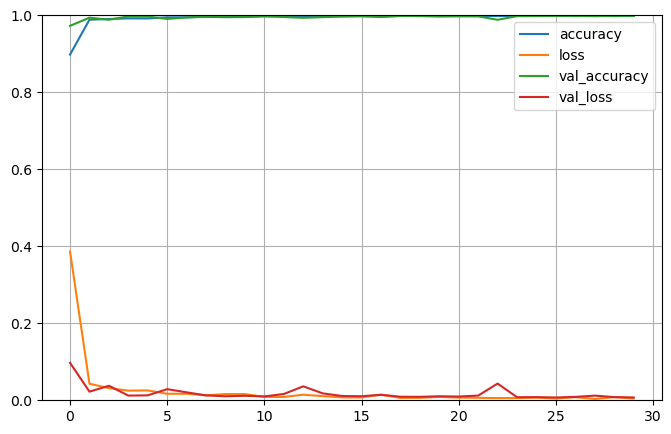

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - loss: 0.0064


In [20]:
accuracy

0.9984697699546814

In [21]:
pred = model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [23]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[ 38,   0,   0, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   1, 418, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ...,  77,   0,   0],
       [  0,   0,   0, ...,   0,  40,   0],
       [  0,   0,   0, ...,   0,   0,  46]], dtype=int64)

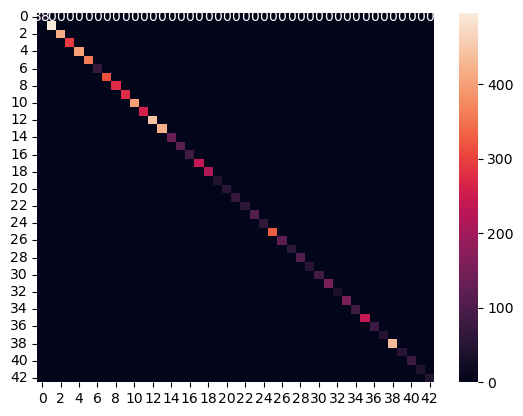

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [25]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       420
           3       0.99      1.00      1.00       294
           4       1.00      1.00      1.00       400
           5       1.00      0.99      0.99       364
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00       313
           8       1.00      1.00      1.00       274
           9       1.00      1.00      1.00       277
          10       1.00      1.00      1.00       398
          11       1.00      1.00      1.00       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      1.00      1.00       135
          15       1.00      1.00      1.00       118
          16       1.00      1.00      1.00        86
          17       1.00    

In [26]:
model.save('capstone_project.h5')

In [27]:
imge=cv2.imread("Dataset/test/00001.png")
imge.shape

(45, 42, 3)

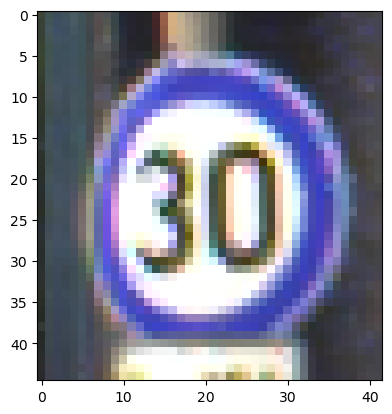

In [28]:
plt.imshow(imge)

In [29]:
imge=cv2.resize(imge, (size,size))
imge=imge/255.0

In [30]:
imge=np.array(imge)

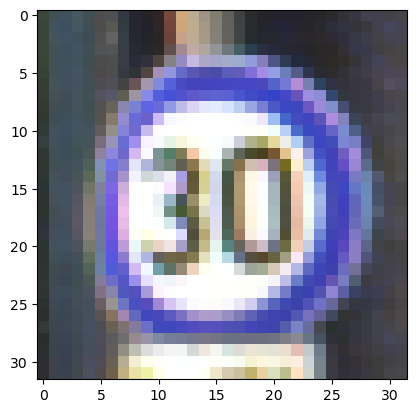

In [31]:
plt.imshow(imge)

In [32]:
imge=np.expand_dims(imge, axis=0)

In [40]:
tahmin=model.predict(imge)
np.argmax(tahmin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1

## Sonuç

Resim sınıflandırma mantığına dayalı derin öğrenme modeli geliştirdiğimiz bu projede trafik işaretlerinin doğru tahmin etmeye çalıştık.